<a href="https://colab.research.google.com/github/chogerlate/cpe342-machine-learning-course-kmutt/blob/main/cpe342_a03_1052.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A03: Siwarat Laoprom 65070501052

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Activity
Use the cancer.xls data and perform Poisson regression analysis

In [30]:
!wget -O cancer.xls https://www.dropbox.com/scl/fi/liwhrsk2voczh7jmajrts/cancer.xls?rlkey=ws3yj709k279k7qaj9iixjw23&dl=0

--2024-09-11 10:28:50--  https://www.dropbox.com/scl/fi/liwhrsk2voczh7jmajrts/cancer.xls?rlkey=ws3yj709k279k7qaj9iixjw23
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb3733da5caa24bc18b170ed752.dl.dropboxusercontent.com/cd/0/inline/CaXTOLLbxoHlEKw9BsmiXokTZU6tokv2ATF6ckhq6wR1c_hdOcLLD0I7wXgYU6NJ8ug361K_i8hrD0cMgmfrxn409VFjrcV1p3smtvQ_8lRB08N87N_a_baGsQyWsSA4Xn4/file# [following]
--2024-09-11 10:28:50--  https://ucb3733da5caa24bc18b170ed752.dl.dropboxusercontent.com/cd/0/inline/CaXTOLLbxoHlEKw9BsmiXokTZU6tokv2ATF6ckhq6wR1c_hdOcLLD0I7wXgYU6NJ8ug361K_i8hrD0cMgmfrxn409VFjrcV1p3smtvQ_8lRB08N87N_a_baGsQyWsSA4Xn4/file
Resolving ucb3733da5caa24bc18b170ed752.dl.dropboxusercontent.com (ucb3733da5caa24bc18b170ed752.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:6016:15::a27d:10f
Connecting to ucb3733da

In [31]:
# work here
cancer = pd.read_excel('cancer.xls', sheet_name='Sheet2',
                       index_col='index')
cancer.head()

,age,smoke,pop,dead
index,,,,
1,40-44,no,656,18
2,45-59,no,359,22
3,50-54,no,249,19
4,55-59,no,632,55
5,60-64,no,1067,117


In [34]:
cancer.replace({'smoke':{'no':'0_no'}}, inplace=True)

In [35]:
cancer_cat = pd.get_dummies(cancer[['age','smoke']], drop_first=True)
cancer_cat.head()

,age_45-59,age_50-54,age_55-59,age_60-64,age_65-69,age_70-74,age_75-79,age_80+,smoke_cigarPipeOnly,smoke_cigarretteOnly,smoke_cigarrettePlus
index,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False


In [36]:
cancer_prep = pd.concat([cancer_cat,cancer['pop']], axis=1)

In [37]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
cancer_prep_1 = pd.DataFrame(mms.fit_transform(cancer_prep), columns=cancer_prep.columns)
cancer_prep_1.head()

,age_45-59,age_50-54,age_55-59,age_60-64,age_65-69,age_70-74,age_75-79,age_80+,smoke_cigarPipeOnly,smoke_cigarretteOnly,smoke_cigarrettePlus,pop
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093719
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043836
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025361
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089688
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162748


In [38]:
cancer['dead']

,dead
index,
1,18
2,22
3,19
4,55
5,117
6,170
7,179
8,120
9,120


In [39]:
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
model = sm.GLM(cancer['dead'].reset_index(drop=True),
               sm.add_constant(cancer_prep_1),
               family = Poisson()).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   dead   No. Observations:                   36
Model:                            GLM   Df Residuals:                       23
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -412.46
Date:                Wed, 11 Sep 2024   Deviance:                       584.90
Time:                        10:28:52   Pearson chi2:                     508.
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.6013      0.075     34.887      0.000       2.455       2.747
age_45-59                0.6242      0.083      7.556      0.000       0.462       0.786
age_50-54                1.0038      0.082     12.256      0.000       0.843       1.164
age_55-59                1.3818      0.065     21.174      0.000       1.254       1.510
age_60-64                1.5012      0.065     23.044      0.000       1.374       1.629
age_65-69                2.1366      0.064     33.517      0.000       2.012       2.262
age_70-74                2.3557      0.072     32.939      0.000       2.215       2.496
age_75-79                2.2041      0.079     27.817      0.000       2.049       2.359
age_80+                  1.9506      0.085     23.084      0.000       1.785       2.116
smoke_cigarPipeOnly      0.2114      0.047      4.520      0.000       0.120       0.303
smoke_cigarretteOnly     0.7818      0.044     17.868      0.000       0.696       0.868
smoke_cigarrettePlus     0.5030      0.057      8.821      0.000       0.391       0.615
pop                      2.4840      0.099     25.099      0.000       2.290       2.678
========================================================================================
"""

In [40]:
model.predict(sm.add_constant(cancer_prep_1))

,0
0,17.014227
1,28.061053
2,39.176018
3,67.078251
4,90.624064
5,159.360220
6,180.317513
7,136.334058
8,102.034593
9,16.983526


# Activity - Estimating Lifetime
- Use Telco Churn dataset and build a Kaplan Meier survival analysis.
- Compare lifetime between different payment methods.

In [5]:
!pip install lifelines

In [6]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [4]:
url = '/content/drive/MyDrive/AIS_DG/Telco-Churn.csv'

In [23]:
telco_data = pd.read_csv(url)
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [24]:
# Convert relevant columns to the correct data type
telco_data['Churn'] = telco_data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Event occurrence (1 = Churn, 0 = No Churn)

In [25]:
duration = telco_data['tenure']
event = telco_data['Churn']

In [26]:
kmf = KaplanMeierFitter()
kmf.fit(duration, event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

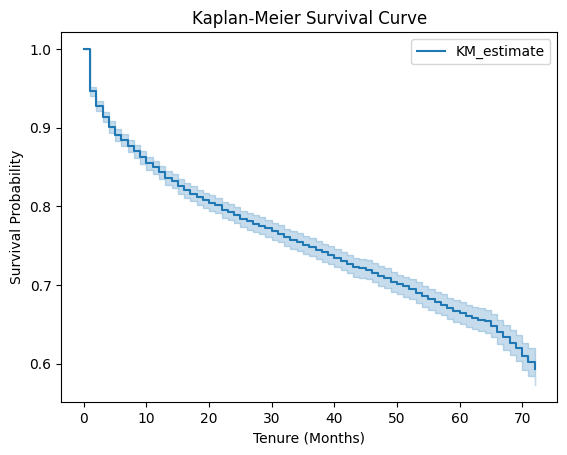

In [27]:
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.show()

### Summary: KMSC of Churn compare to Tenure
- Over time, the survival probability decreases steadily, indicating that customers are churning.
- By around 60-70 months, the survival probability has dropped to around 0.6, indicating that approximately 60% of customers are still active, and 40% have churned.

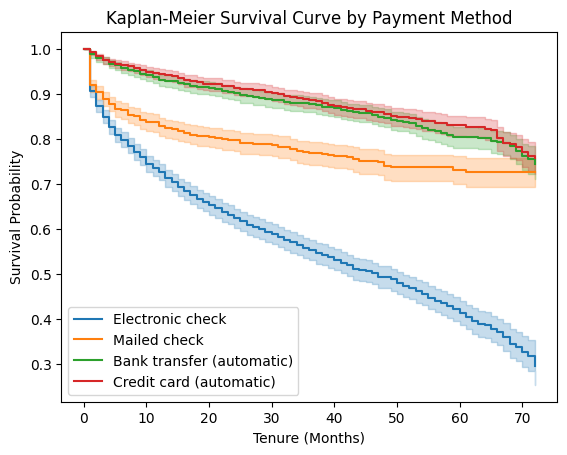

In [28]:
payment_method = telco_data['PaymentMethod'].unique()
for i in payment_method:
    method_data = telco_data[telco_data['PaymentMethod'] == i]
    kmf.fit(method_data['tenure'], method_data['Churn'], label=i)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curve by Payment Method')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.show()


### Summary: KMSC of churn in each payment methods compare to Tenure
From the graph we gain interesting insight as follow:
1. **Electronic Check** is the least favorable payment method for customer retention. Customers using it have the highest churn rate.
2. **Automatic Payment Methods** (Bank Transfer and Credit Card): These methods show the best retention, likely because automatic payments reduce friction and increase the likelihood of continued subscription or service use.

What business should do after we present this analysis result?
- Encouraging customers to switch to automatic payment methods could significantly improve retention rates.